#### Hypothesis Testing of Human Height Data

In [1]:
from azureml import Workspace

ws = Workspace()
ds = ws.datasets['GaltonFamilies.csv']
galton = ds.to_dataframe()

In [2]:
galton

,Case,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,1,78.5,67.0,75.43,4,1,male,73.2
1,2,1,78.5,67.0,75.43,4,2,female,69.2
2,3,1,78.5,67.0,75.43,4,3,female,69.0
3,4,1,78.5,67.0,75.43,4,4,female,69.0
4,5,2,75.5,66.5,73.66,4,1,male,73.5
5,6,2,75.5,66.5,73.66,4,2,male,72.5
6,7,2,75.5,66.5,73.66,4,3,female,65.5
7,8,2,75.5,66.5,73.66,4,4,female,65.5
8,9,3,75.0,64.0,72.06,2,1,male,71.0
9,10,3,75.0,64.0,72.06,2,2,female,68.0


In [4]:
galton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 9 columns):
Case               934 non-null int64
family             934 non-null object
father             934 non-null float64
mother             934 non-null float64
midparentHeight    934 non-null float64
children           934 non-null int64
childNum           934 non-null int64
gender             934 non-null object
childHeight        934 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 65.8+ KB


In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.stats.weightstats as ws
%matplotlib inline

In [14]:
def t_test_man(df,col1,col2,alpha):
    n, _, diff, _, _, _ = ss.describe(df[col1] - df[col2])
    degfree = n - 1
    temp1 = df[col1].as_matrix()
    temp2 = df[col2].as_matrix()
    res = ss.ttest_rel(temp1, temp2)
    means = ws.CompareMeans(ws.DescrStatsW(temp1), ws.DescrStatsW(temp2))
    confint = means.tconfint_diff(alpha=alpha, alternative='two-sided', usevar='unequal') 
    degfree = means.dof_satt()
    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index) 

In [25]:
def ttest_hist(df, col1, col2, num_bins = 30, alpha =0.05):
    ## Setup for ploting two charts one over the other
    fig, ax = plt.subplots(2, 1, figsize = (12,8))
    mins = min([df[col1].min(), df[col2].min()])
    maxs = max([df[col1].max(), df[col2].max()])
    mean1 = df[col1].mean()
    mean2 = df[col2].mean() 
    ttest_temp = t_test_man(df, col1, col2, alpha)
    pv1 = mean2 + ttest_temp[4]    
    pv2 = mean2 + ttest_temp[5] 
    ## Plot the histogram   
    temp = df[col1].as_matrix()
    ax[1].hist(temp, bins = 30, alpha = 0.7)
    ax[1].set_xlim([mins, maxs])
    ax[1].axvline(x=mean1, color = 'red', linewidth = 4)    
    ax[1].axvline(x=pv1, color = 'red', linestyle='--', linewidth = 4)
    ax[1].axvline(x=pv2, color = 'red', linestyle='--', linewidth = 4)
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(col1) 
    ## Plot the histogram   
    temp = df[col2].as_matrix()
    ax[0].hist(temp, bins = 30, alpha = 0.7)
    ax[0].set_xlim([mins, maxs])
    ax[0].axvline(x=mean2, color = 'red', linewidth = 4)
    ax[0].set_ylabel('Count')
    ax[0].set_xlabel(col2)
    return ttest_temp

DegFreedom    902.412325
Difference     -0.044812
Statistic      -0.350524
PValue          0.726109
Low95CI        -0.345756
High95CI        0.256132
dtype: float64

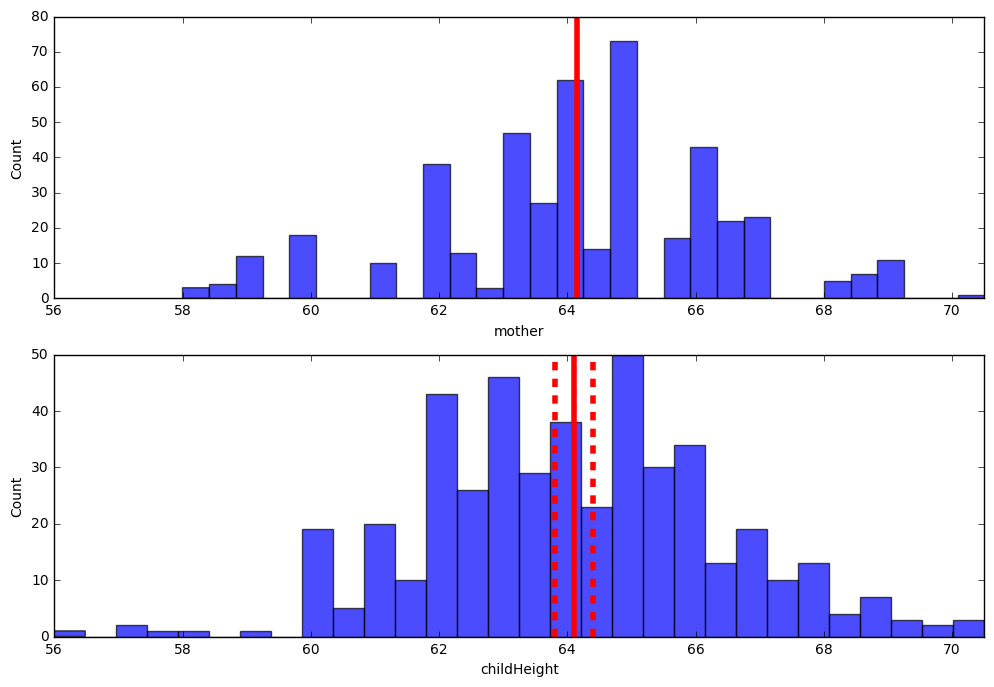

In [26]:
## for Heights of Mother and their daughters
daughters = galton[galton.gender == 'female']
ttest_hist(daughters, 'childHeight', 'mother')

- The difference of the means is only 0.04 inches. You can see this small difference graphically by comparing the positions of the solid red lines showing the means of the two distributions.
- The critical value of the two-sided t-statistic is 1.96. The t-statistic of 0.35 is smaller than this critical value.
- The P-value is 0.73, which is larger than the confidence level of 0.05.
- The 95% confidence interval of the difference is from -0.26 to 0.35, which overlaps 0. You can see the confidence interval plotted as the two dashed red lines in the lower chart shown above. This confidence interval around the mean of the mother's heights does overlaps the mean of the dauther's height.
- Overall, these statistics indicate you cannot reject the null hypothesis that there are is not a significant difference in the means.

DegFreedom     9.459687e+02
Difference     5.200832e+00
Statistic      3.949802e+01
PValue        6.323181e-153
Low95CI        4.887331e+00
High95CI       5.514333e+00
dtype: float64

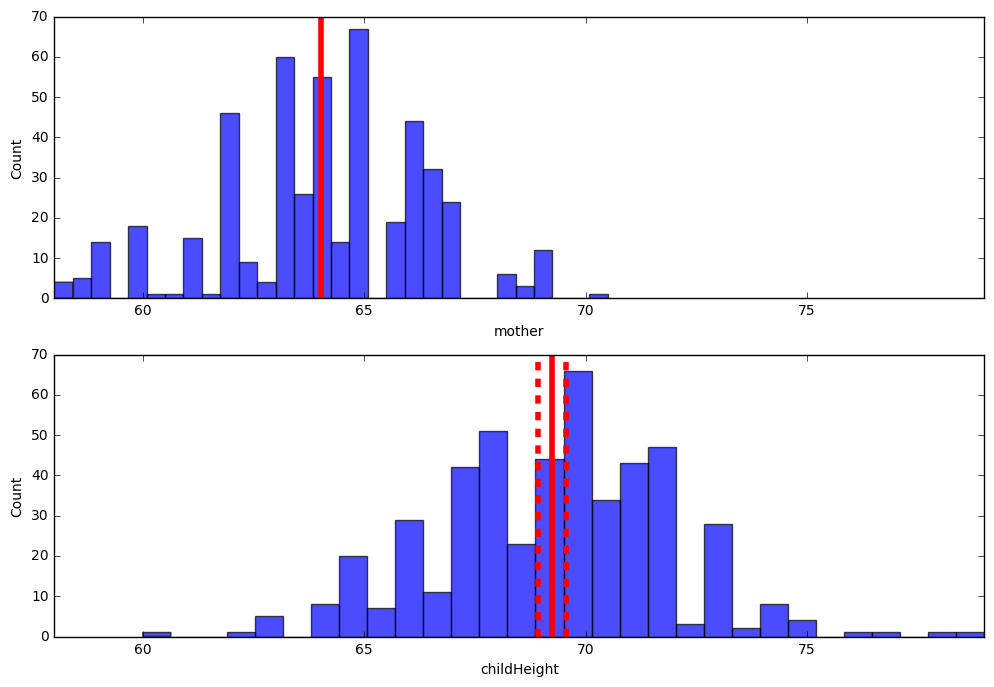

In [27]:
#for mother and sons
sons = galton[galton.gender == 'male']
ttest_hist(sons, 'childHeight', 'mother')

- The difference of the means is 5.2 inches. You can see this difference graphically by comparing the positions of the solid red lines showing the means of the two distirbutions.
- The critical value of the two-sided t-statistic at 945 degrees of freedom is 1.96. The t-statistic of 39.5 is larger than this critical value.
- The P-value is effectively 0, which is smaller than the confidence level of 0.05.
- The 95% confidence interval of the difference in means is from 4.9 to 5.5, which does not overlap 0. You can see the confidence interval plotted as the two dashed red lines in the lower chart shown above. This confidence interval around the mean of the mother's heights does not overlap with the mean of the son's height.
- Overall, these statistics indicate you can reject the null hypothesis, or that there difference in the means is not 0.

DegFreedom    944.397284
Difference      0.096466
Statistic       0.774935
PValue          0.438760
Low95CI        -0.216098
High95CI        0.409029
dtype: float64

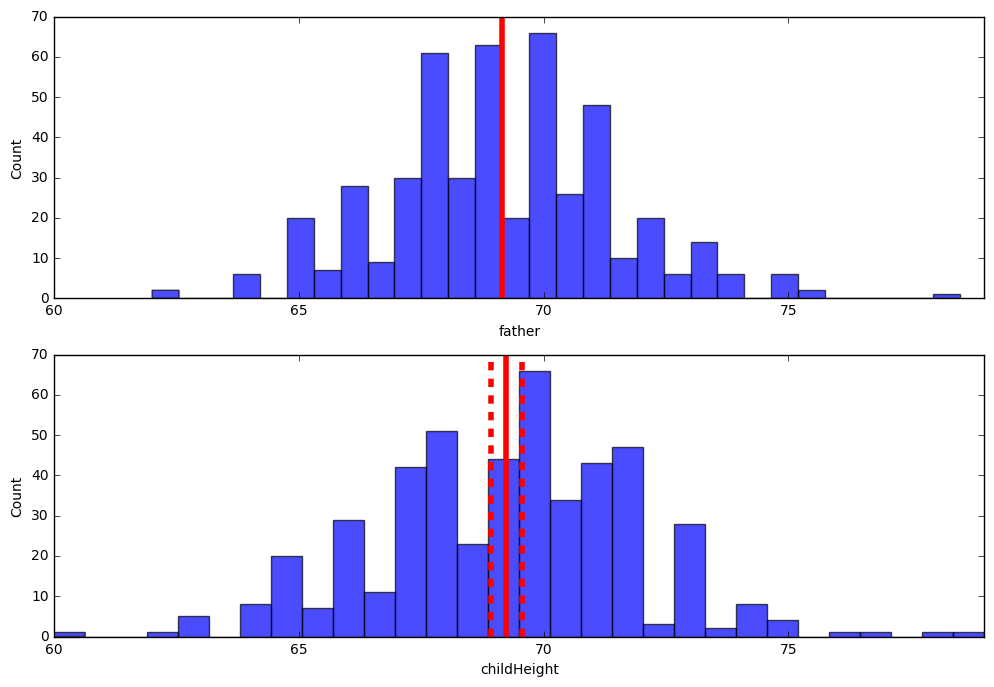

In [28]:
#for Father and son
ttest_hist(sons, 'childHeight', 'father')

- The difference of the means is 0.097 inches. You can see this difference graphically by comparing the positions of the solid red lines showing the means of the two distirbutions.
- The critical value of the two-sided t-statistic at 945 degrees of freedom is 1.96. The t-statistic of 0.774935 is smaller than this critical value.
- The P-value is 0.4387, which is larger than the confidence level of 0.05.
- The 95% confidence interval of the difference in means is from -0.216 to 0.41, which does overlap 0. You can see the confidence interval plotted as the two dashed red lines in the lower chart shown above.
- Overall, these statistics indicate you can't reject the null hypothesis, or  difference in the means is 0.